In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, LogNorm
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
from netCDF4 import Dataset

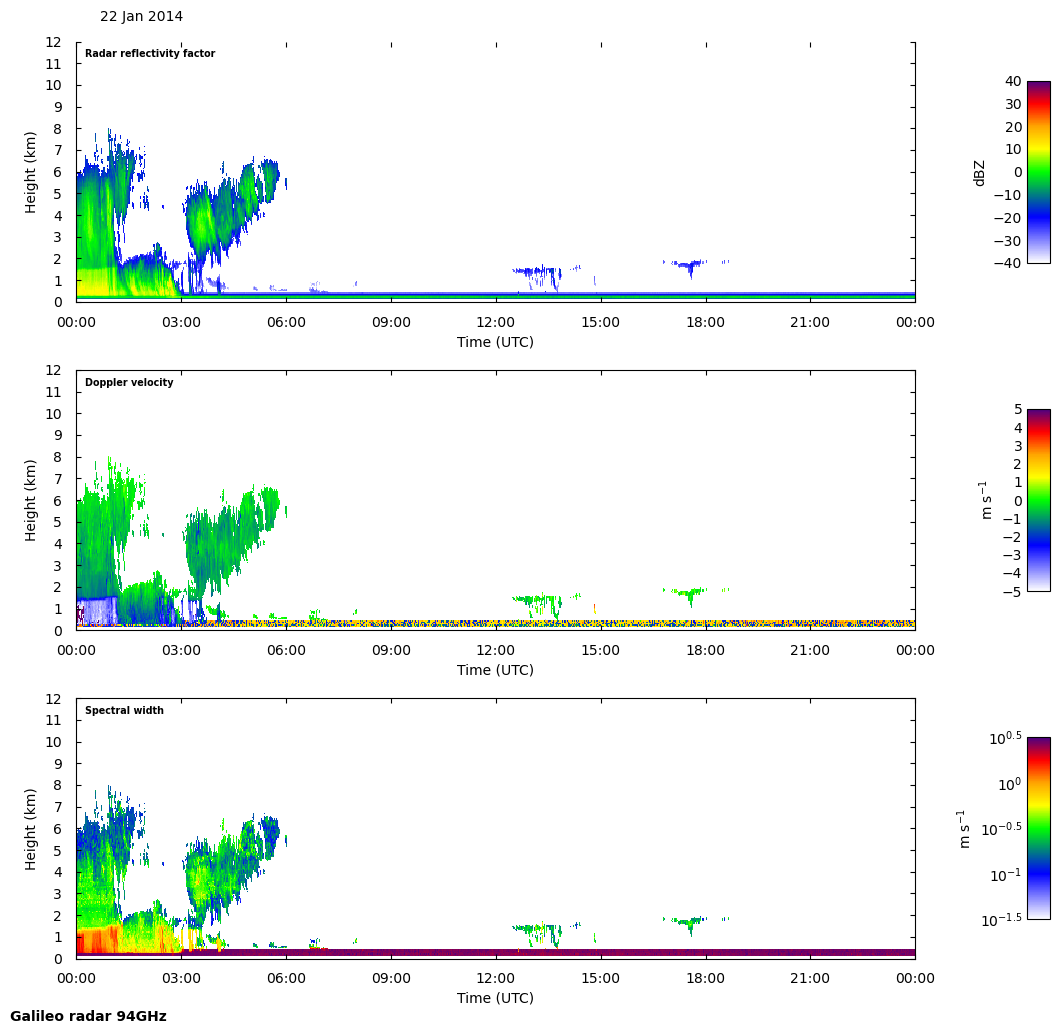

In [2]:
file = '/badc/chilbolton/data/radar-galileo/2014/01/cfarr-radar-galileo_chilbolton_20140122_fix.nc'
data = Dataset(file, 'r')

cmap = LinearSegmentedColormap.from_list('', [(0, 'white'), (0.25, 'blue'), (0.5, 'lime'), (0.625, 'yellow'), (0.75, 'orange'), (0.875, 'red'), (1, 'indigo')])
x_lims = pd.to_datetime(data.variables['time'][:], unit='s')
y_lims = data.variables['range'][:] / 1000
fig, axes = plt.subplots(3, figsize=(12, 10))
ax1, ax2, ax3 = axes

image1 = ax1.imshow(data['ZED_HC'][:].T, extent=[x_lims[0], x_lims[-1], y_lims[0], y_lims[-1]],
                    vmin=-40, vmax=40, cmap=cmap, interpolation='nearest', aspect='auto', origin='lower')
image2 = ax2.imshow(data['VEL_HC'][:].T, extent=[x_lims[0],x_lims[-1], y_lims[0], y_lims[-1]],
                    vmin=-5, vmax=5, cmap=cmap, interpolation='nearest', aspect='auto', origin='lower')
image3 = ax3.imshow(data['SPW_HC'][:].T, extent=[x_lims[0],x_lims[-1], y_lims[0],y_lims[-1]],
                    norm=LogNorm(10 ** -1.5, 10 ** 0.5), cmap=cmap, interpolation='nearest', aspect='auto', origin='lower')

ax1.spines['top'].set_visible(False)

for ax in axes:
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    ax.set_xlabel('Time (UTC)')
    ax.set_ylabel('Height (km)')
    ax.set_xticks([pd.to_datetime(x, unit='s') for x in range(0, 97200, 10800)])
    ax.set_yticks(np.arange(0, 13)) 
    ax.set_ylim(0, 12)
    ax.tick_params(axis='both', direction='in', pad=10, top=True, right=True)

cbar1 = fig.colorbar(image1, shrink=0.7, ticks=np.arange(-40, 50, 10), pad=0.1, aspect=8)
cbar1.set_label('dBZ')
cbar2 = fig.colorbar(image2, shrink=0.7, ticks=np.arange(-5, 6, 1), pad=0.1, aspect=8)
cbar2.set_label('m s$^{-1}$')
cbar3 = fig.colorbar(image3, shrink=0.7, ticks=10 ** np.arange(-1.5, 1, 0.5), pad=0.1, aspect=8,
                     format=FuncFormatter(lambda x, pos: '10$^{' + f'{round(math.log(x, 10), 1):g}' + '}$'))
cbar3.set_label('m s$^{-1}$')
cbar3.minorticks_off()

for cbar in [cbar1, cbar2, cbar3]:
    cbar.ax.tick_params(size=0)
    cbar.ax.yaxis.set_label_position('left')
    cbar.ax.yaxis.set_ticks_position('left')

fig.autofmt_xdate(rotation=0, ha='center')
ax1.text(0.01, 0.97, 'Radar reflectivity factor', ha='left', va='top', transform=ax1.transAxes, weight='bold', size='x-small')
ax2.text(0.01, 0.97, 'Doppler velocity', ha='left', va='top', transform=ax2.transAxes, weight='bold', size='x-small')
ax3.text(0.01, 0.97, 'Spectral width', ha='left', va='top', transform=ax3.transAxes, weight='bold', size='x-small')
plt.figtext(0.075, 1, '22 Jan 2014')
plt.figtext(0, 0, 'Galileo radar 94GHz', weight='bold')
plt.tight_layout()
plt.show()

data.close()